In [1]:
""" WATERSHED ALGORITHI """
# IN GRAY SCALE high intensity -> denotes peaks and hills
#               low intensity -> denotes valleys 

# THIS ALGORITHM CAN FILL EVERY ISOLATED VALLEYS(LOCAL MINIMA) WITH DIFFERENT COLORED WATER(LABELS)


' WATERSHED ALGORITHI '

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [5]:
sep_coins = cv2.imread('/home/linux/Desktop/Computer Vision/5. Object Detection with opencv and python/DATA/pennies.jpg')

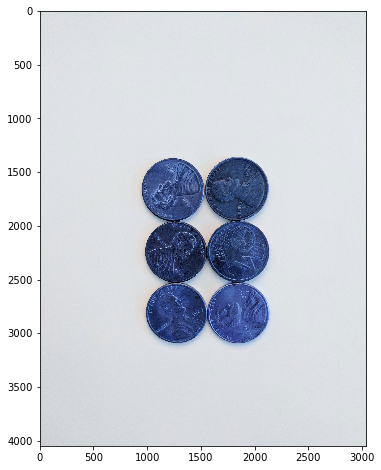

In [6]:
display(sep_coins)

In [7]:
# STEPS 
# Median Blur
# Grayscale
# Binary Threshold
# Finding Contours

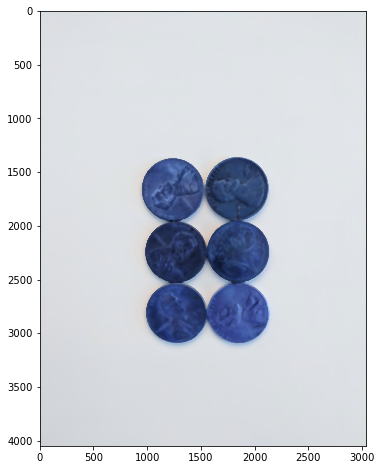

In [9]:
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

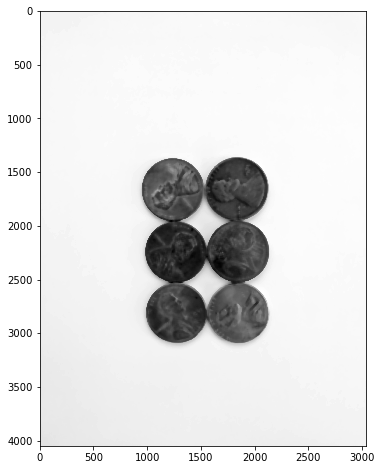

In [14]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins, cmap ='gray')

In [15]:
ret, sep_threshold = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

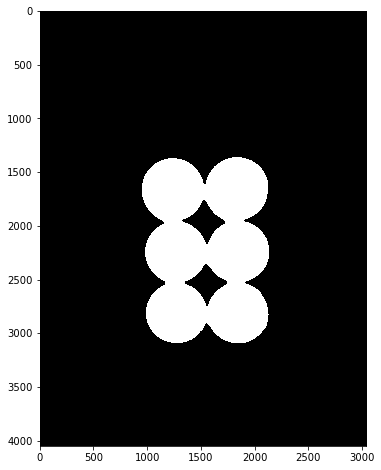

In [17]:
display(sep_threshold, cmap ='gray')

In [19]:
contours ,hierarcy = cv2.findContours(sep_threshold.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
for i in range(len(contours)):
    if hierarcy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

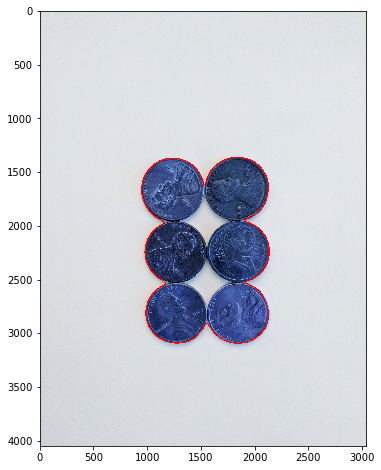

In [22]:
display(sep_coins)

In [23]:
# WANT TO SOLVE THE PROBLEM OF CONTOURS

In [25]:
#### Step 1: Read Image ####
img = cv2.imread('/home/linux/Desktop/Computer Vision/5. Object Detection with opencv and python/DATA/pennies.jpg')

In [26]:
#### Step 2: Apply Blur ####
img = cv2.medianBlur(img, 35)

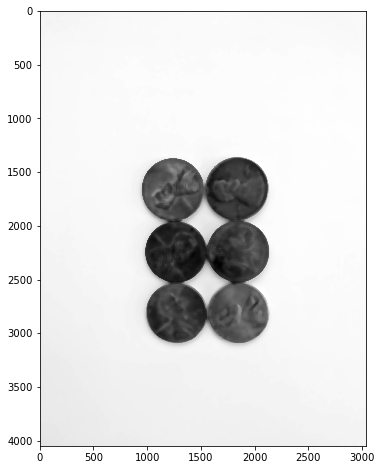

In [37]:
#### Step 3: Convert to Grayscale ####
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray, cmap = 'gray')

In [39]:
#### Step 4: Apply Threshold (Inverse Binary with OTSU as well) ####
ret, img_threshold = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# cv2.THRESH_OTSU this used to reduce noise

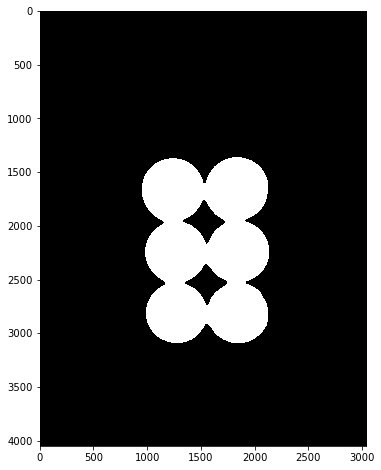

In [36]:
display(img_threshold, cmap ='gray')

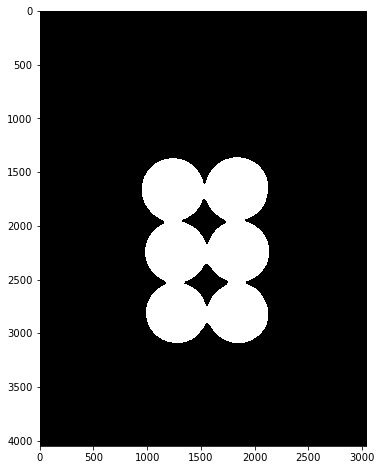

In [42]:
#### Step 5Noise Removal (optional) ####
kernel = np.ones((3,3), np.uint8)

openning = cv2.morphologyEx(img_threshold, cv2.MORPH_OPEN, kernel, iterations =2)
display(openning, cmap ='gray')

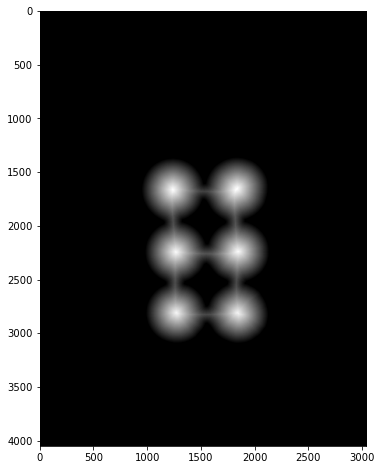

In [44]:
#### Step 6: Find Sure Foreground ####
# Distance Transform 
# center of shape is brighter and when go far of center became darker

dist_transform = cv2.distanceTransform(openning, cv2.DIST_L2, 5)
display(dist_transform, cmap = 'gray')

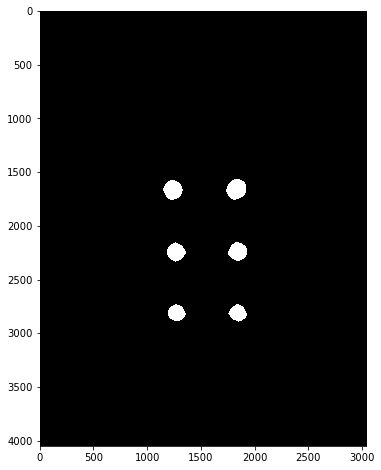

In [47]:
# Finding sure foreground area
# To get clear 6 points make threshold of distance transform
ret ,sure_fg =cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg, cmap ='gray')

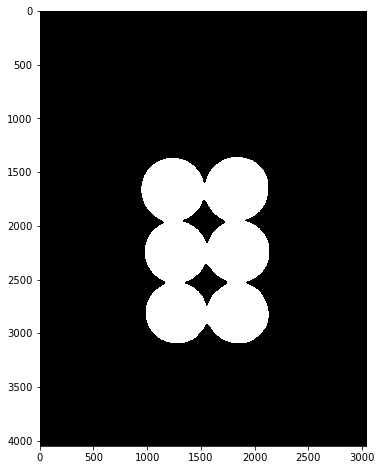

In [51]:
#### Step 6: Grab Background that you are sure of ####
# sure background area
sure_bg = cv2.dilate(openning,kernel,iterations=3)
display(sure_bg,cmap='gray')

In [52]:
sure_fg = np.uint8(sure_fg)

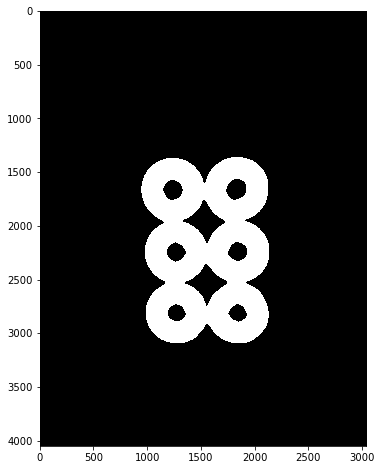

In [54]:
#### Step 8: Find Unknown Region ####
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown, cmap = 'gray')

In [55]:
#### Step 9: Label Markers of Sure Foreground ####

In [61]:
ret ,markers = cv2.connectedComponents(sure_fg)
markers = markers +1 # Add one to all labels so that sure background is not 0, but 1
markers[unknown == 255] =0 # Now, mark the region of unknown with zero

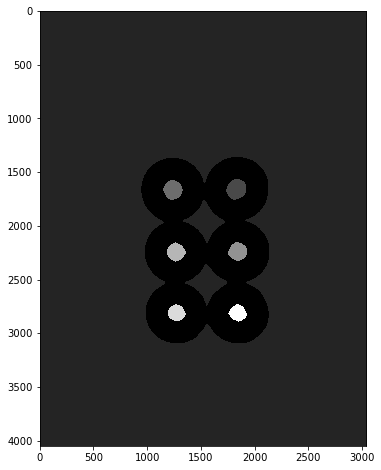

In [62]:
display(markers ,cmap ='gray')

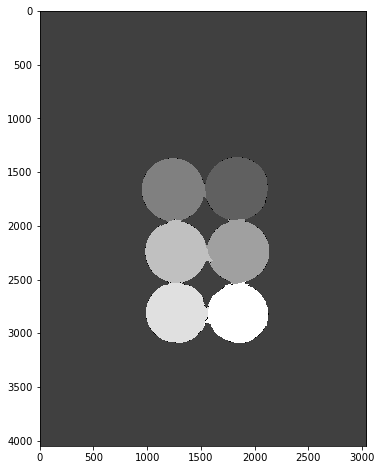

In [63]:
#### Step 10: Apply Watershed Algorithm to find Markers ####
markers = cv2.watershed(img,markers)
display(markers, cmap = 'gray')

In [65]:
#### Step 11: Find Contours on Markers ####
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

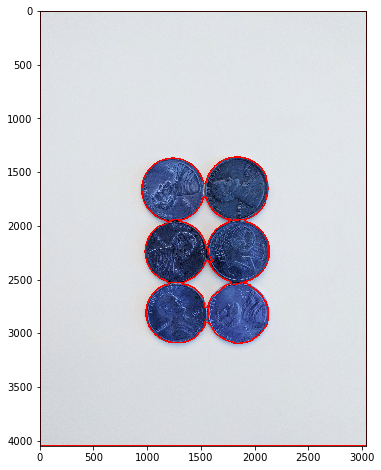

In [66]:
display(sep_coins, cmap = 'gray')